In [1]:
import pydicom
import matplotlib.pyplot as plt
import os

We can use the pydicom function `dcmread` to load a dataset as a pydicom-specific class. Printing the dataset will display all its available attributes, corresponding to Dicom header tags. These may be used to access the data. For example, the image itself is saved as the `pixel_array` attribute. It is read in as a 2D numpy array of unsigned int16 values. Most other attributes are read in as strings.

For reference, here is a basic example.

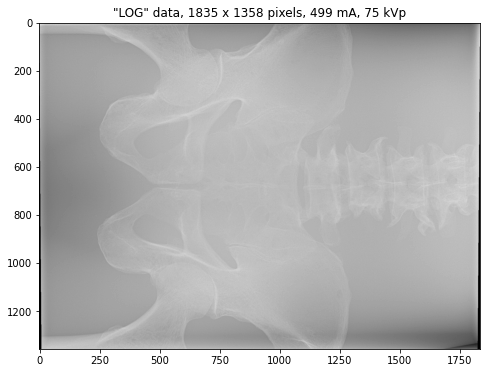

In [2]:
# first, read in the data and get a list of files
imd = 'imgs/'               
L = sorted(os.listdir(imd)) 

# read the first dataset
i = 0
ds = pydicom.dcmread(imd+L[i])  

# extract some key Dicom information
M = ds.pixel_array                        # the image
rows, cols = ds.Rows, ds.Columns          # image dimensions
pir = ds.PixelIntensityRelationship       # log or linear
mA = ds.XRayTubeCurrent
kVp = int(ds.KVP)

# plot the image
fig,ax = plt.subplots(1,1,figsize=[8,6])
ax.imshow(M, cmap='gray')
ax.set_title(f'"{pir}" data, {cols} x {rows} pixels, {mA} mA, {kVp} kVp')
plt.show()

This is a image of the anthropomorphic phantom we scanned. The "LOG" indicates the pixel values are not raw and have been through some post-processing. There are also header attributes for the image size, tube current, and kVp.

Let's confirm that all the images look reasonable and check whether they use raw or log pixel values.

LOG
LOG
LIN
LIN
LOG
LOG
LOG
LOG
LOG
LOG
LOG
LIN
LIN
LIN
LIN
LIN
LIN
LIN


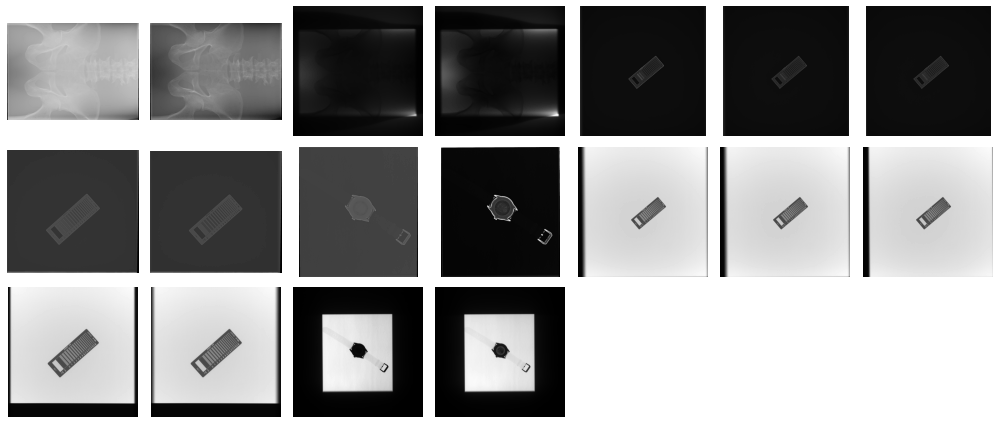

In [3]:
yd, xd = 3,7
fig,ax = plt.subplots(yd,xd,figsize=[xd*2, yd*2])

for i in range(len(L)):
    ds = pydicom.dcmread(imd+L[i])  
    
    # plot image
    ax[i//xd, i%xd].imshow(ds.pixel_array, cmap='gray')
    
    # print pixel relationship
    print(ds.PixelIntensityRelationship)

for i in range(xd*yd):
    # turn off axes so images look niver
    ax[i//xd, i%xd].axis('off')
    
fig.tight_layout()
plt.show()

This looks like all of our images, but some of the data is linear and some is logged. It is important to be mindful of this for our computations.

We can print out the entire Dicom header to see all available information. 

In [4]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 168
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Processing
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.203.4.2147483647.1643241378.878071
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113619.6.203
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Processing
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.203.4.2147483647.1643241378.878071
(0008, 0020) Study Date                          DA: '20220126'
(0008, 0